# Univariate Basic Statistical Plots (Python Matplotlib)

Covers:

✔ Histogram

- Synthetic Gaussian mixture (flexible for shapes)


## IMPORTS & DATASET

In [ ]:
# ! pip install requests beautifulsoup4 numpy pandas matplotlib seaborn
# ! pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp312-cp312-win_amd64.whl (38.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import gaussian_kde

### Dataset

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)
np.random.seed(42)

# Synthetic dataset: Gaussian mixture
def synthetic_data(n=1000):
    data = np.concatenate([
        np.random.normal(0, 1, n//2),
        np.random.normal(4, 0.8, n//2)
    ])
    return data

data = synthetic_data()

# Online dataset (via sklearn): Iris sepal length
iris = load_iris()
iris_data = iris.data[:,0]


## Histogram

Histogram shows frequency distribution by placing values into bins.

Adjustable features:

- bins: number of bars

- density=True: convert to probability density

- range: restrict plot

- alpha: transparency

- edgecolor: bar outlines

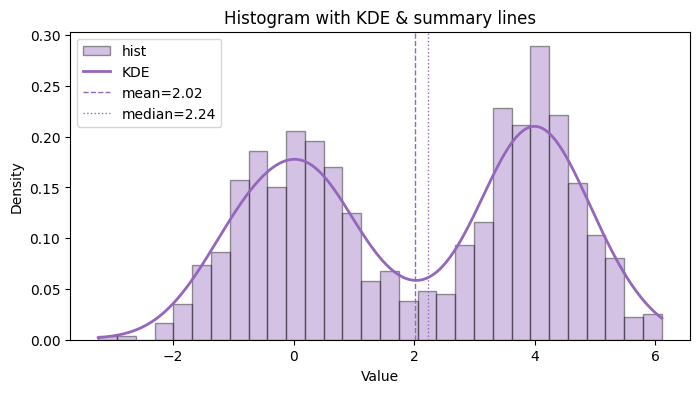

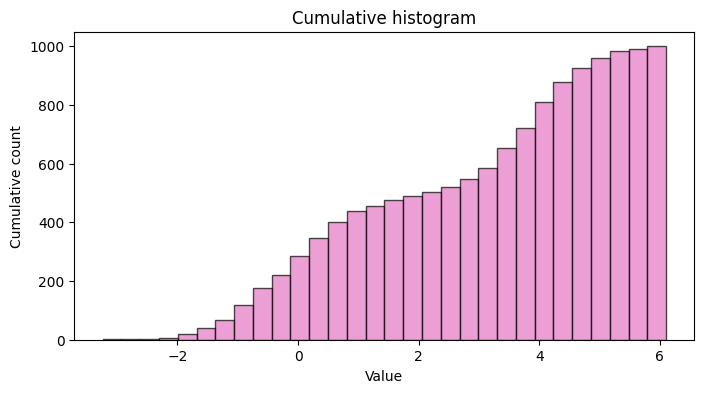

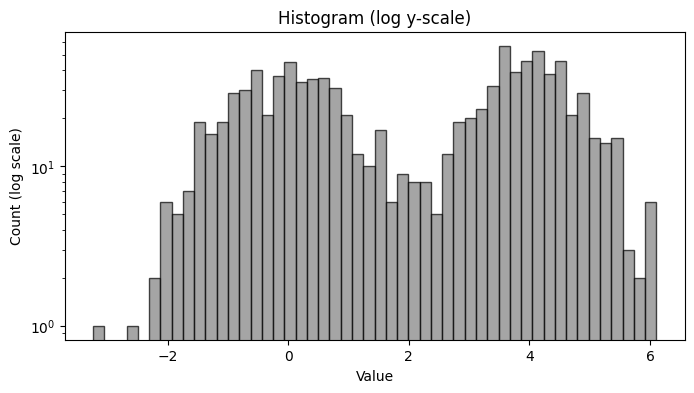

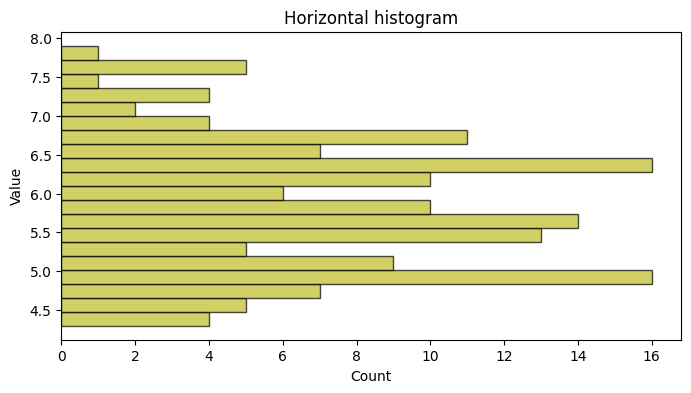

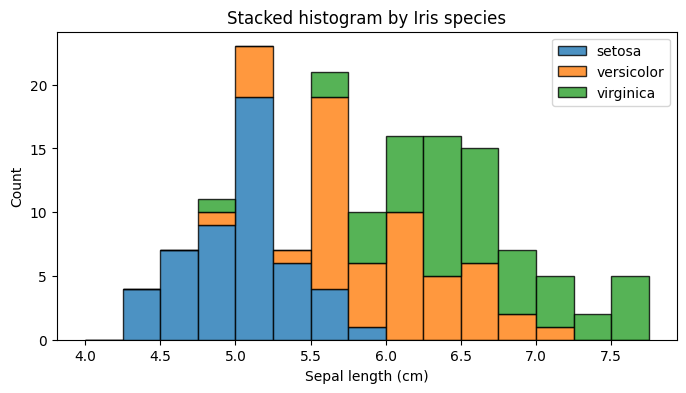

In [ ]:
# More histogram variations (uses existing `data`, `iris_data`, and `iris`)

def hist_with_kde(arr, bins=40, color="C0", label=None):
    # density histogram + KDE overlay
    counts, bin_edges, _ = plt.hist(arr, bins=bins, density=True, alpha=0.4,
                                    edgecolor="k", color=color, label=label or "hist")
    x = np.linspace(arr.min(), arr.max(), 512)
    kde = gaussian_kde(arr)
    plt.plot(x, kde(x), color=color, lw=2, label="KDE")
    mean = arr.mean()
    median = np.median(arr)
    plt.axvline(mean, color=color, linestyle="--", lw=1, label=f"mean={mean:.2f}")
    plt.axvline(median, color=color, linestyle=":", lw=1, label=f"median={median:.2f}")
    plt.legend()
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram with KDE & summary lines")
    plt.show()

def cumulative_hist(arr, bins=40, density=False, color="C1"):
    plt.hist(arr, bins=bins, cumulative=True, density=density,
             color=color, alpha=0.7, edgecolor="k")
    plt.xlabel("Value")
    plt.ylabel("Cumulative density" if density else "Cumulative count")
    plt.title("Cumulative histogram")
    plt.show()

def log_scale_hist(arr, bins=40, color="C2"):
    plt.hist(arr, bins=bins, alpha=0.7, edgecolor="k", color=color)
    plt.yscale("log")
    plt.xlabel("Value")
    plt.ylabel("Count (log scale)")
    plt.title("Histogram (log y-scale)")
    plt.show()

def horizontal_hist(arr, bins=40, color="C3"):
    plt.hist(arr, bins=bins, orientation="horizontal", color=color, alpha=0.7, edgecolor="k")
    plt.ylabel("Value")
    plt.xlabel("Count")
    plt.title("Horizontal histogram")
    plt.show()

def stacked_hist_by_class(iris_data, iris, bins=15):
    classes = np.unique(iris.target)
    arrays = [iris_data[iris.target == c] for c in classes]
    labels = iris.target_names
    plt.hist(arrays, bins=bins, stacked=True, alpha=0.8, edgecolor="k", label=labels)
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Count")
    plt.title("Stacked histogram by Iris species")
    plt.legend()
    plt.show()

# Examples using existing data
# 1) KDE overlay for synthetic data
hist_with_kde(data, bins=30, color="C4")

# 2) Cumulative histogram (counts) for synthetic data
cumulative_hist(data, bins=30, density=False, color="C6")

# 3) Log-scale y-axis
log_scale_hist(data, bins=50, color="C7")

# 4) Horizontal histogram for iris sepal length
horizontal_hist(iris_data, bins=20, color="C8")

# 5) Stacked histogram by class for iris sepal length
stacked_hist_by_class(iris_data, iris, bins=np.arange(4.0, 8.0, 0.25))